# INTRODUCTION<br>



<div style="text-align:center">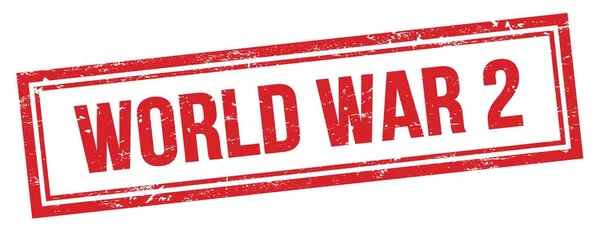</div>
* Hi guys, I hope you are doing fine.<br><br>
* In this kernel, we use multipla data sources that are aerial bombing operations and weather conditions in world war 2.<br><br>
* After this point, I will use acronym ww2 for world war 2.<br><br>
* We will start with data description and cleaning, then we will visualize our data to understand better. These processes can be called EDA (Exploratory Data Analysis).<br><br>
* After that, we will focus on time series prediction to predict when bombing operations are done.<br><br>
* For time series prediction, we will use ARIMA method that will be a tutorial.<br><br>


Content:<br><br>

 &emsp;[1.Load the Data](#)<br>
 &emsp;[2.Data Description](#)<br>
 &emsp;[3.Data Cleaning](#)<br>
 &emsp;[4.Data Visualization](#)<br>
 &emsp;[5.Time Series Prediction with ARIMA](#)<br>
  &emsp;&emsp;[6.What is Time Series ?](#)<br>
 &emsp; &emsp;[7.Stationarity of a Time Series](#)<br>
 &emsp; &emsp;[8.Make a Time Series Stationary](#)<br>
 &emsp; &emsp; &emsp;[9.Moving Average method](#)<br>
 &emsp; &emsp; &emsp;[10.Differencing method](#)<br>
 &emsp; &emsp;[11.Forecasting a Time Series](#)<br>
 &emsp;[12.Conclusion](#)<br>

In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
# import plotly.plotly as py # visualization library
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))
# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.
#> !pip install chart_studio   if  dont work run this code in console

['world-war-ii', 'weatherww2']


<a id='1'></a><br>
# Load the Data<br>
As I mentioned at introduction, we use multiple data sources.<br>
&emsp;Aerial Bombing Operations in WW2<br>
&emsp;&emsp;Shortly, this data includes bombing operations. For example, USA who use ponte olivo airfield bomb Germany (Berlin) with A36 air craft in 1945.<br>
&emsp;Wether Conditions in WW2<br>
&emsp;&emsp;Shortly, weather conditions during ww2. For example, according to george town weather station, average temperature is 23.88 in 1/7/1942.<br>
&emsp;&emsp;This data set has 2 subset in it. First one includes weather station locations like country, latitude and longitude.<br>
&emsp;&emsp;Second one includes measured min, max and mean temperatures from weather stations.<br>

In [92]:
# bombing data
aerial = pd.read_csv("../input/world-war-ii/operations.csv")
# first weather data that includes locations like country, latitude and longitude.
weather_station_location = pd.read_csv("../input/weatherww2/Weather Station Locations.csv")
# Second weather data that includes measured min, max and mean temperatures
weather = pd.read_csv("../input/weatherww2/Summary of Weather.csv")

<a id='2'></a><br>
# Data Description
<p>I only explain data features that we will use in this kernel.</p>
<ul>
<li><strong>Aerial bombing Data description:</strong><ul>
<li>Mission Date: Date of mission</li>
<li>Theater of Operations: Region in which active military operations are in progress; "the army was in the field awaiting action"; Example: "he served in the Vietnam theater for three years"</li>
<li>Country: Country that makes mission or operation like USA</li>
<li>Air Force: Name or id of air force unity like 5AF</li>
<li>Aircraft Series: Model or type of aircraft like B24</li>
<li>Callsign: Before bomb attack, message, code, announcement, or tune that is broadcast by radio.</li>
<li>Takeoff Base: Takeoff airport name like Ponte Olivo Airfield </li>
<li>Takeoff Location: takeoff region Sicily</li>
<li>Takeoff Latitude: Latitude of takeoff region</li>
<li>Takeoff Longitude: Longitude of takeoff region</li>
<li>Target Country: Target country like Germany</li>
<li>Target City: Target city like Berlin</li>
<li>Target Type: Type of target like city area</li>
<li>Target Industry: Target industy like town or urban</li>
<li>Target Priority: Target priority like 1 (most)</li>
<li>Target Latitude: Latitude of target </li>
<li>Target Longitude: Longitude of target</li>
</ul>
</li>
<li><strong>Weather Condition data description:</strong><ul>
<li>Weather station location:<ul>
<li>WBAN: Weather station number</li>
<li>NAME: weather station name</li>
<li>STATE/COUNTRY ID: acronym of countries</li>
<li>Latitude: Latitude of weather station</li>
<li>Longitude: Longitude of weather station</li>
</ul>
</li>
<li>Weather:<ul>
<li>STA: eather station number (WBAN)</li>
<li>Date: Date of temperature  measurement </li>
<li>MeanTemp: Mean temperature</li>

<a id='3'></a><br>
# Data Cleaning<ul>
<li>Aerial  Bombing data includes a lot of NaN value. Instead of usign them, I drop some NaN values. It does not only remove the uncertainty but it also easa visualization process.<ul>
<li>Drop countries that are NaN</li>
<li>Drop if target longitude is NaN</li>
<li>Drop if takeoff longitude is NaN</li>
<li>Drop unused features</li>
</ul>
</li>
<li>Weather Condition data does not need any cleaning. According to exploratory data analysis and visualization, we will choose certain location to examine deeper. However, lets put our data variables what we use only. </li>
</ul>

In [93]:
aerial.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


In [94]:
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
weather_station_location.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [96]:
# # drop true that are NaN

# ss=pd.DataFrame()
#ss["one"] = pd.Series([12, 5, None, 5, None, 11])
# ss
# ss.isna()
# ss=ss[pd.isna(ss.one)==False]
# ss


In [97]:
# drop countries that are NaN
aerial = aerial[pd.isna(aerial.Country)==False]
# drop if target longitude is NaN
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]
# Drop if takeoff longitude is NaN
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]
# drop unused features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

In [98]:
aerial.head()
#aerial.info()

,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Callsign,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude
0,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SPADAFORA,NaN,NaN,NaN,38.22,15.37
2,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,COSENZA,NaN,NaN,NaN,39.27,16.25
3,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.43,15.90
8,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SCILLA,NaN,NaN,NaN,38.23,15.72
9,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,ARMAMENT AND ORDNANCE PLANTS,NaN,38.43,15.90


In [99]:
# what we will use only
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   Latitude          161 non-null    float64
 4   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [100]:
# what we will use only
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


<a id='4'></a></h2><ul>
# Data Visualization
<li>Lets start with basics of visualization that is understanding data.<ul>
<li>How many country which attacks</li>
<li>Top target countries</li>
<li>Top 10 aircraft series</li>
<li>Takeoff base locations (Attacjk countries)</li>
<li>Target locations (If you do not understand methods of pyplot look at my pyplot tutorial: https://www.kaggle.com/tolgatanrisever/world-univetcity-rank-plotly</li>
<li>Bombing paths</li>
<li>Theater of Operations</li>
<li>Weather station locations</li>
</ul>
</li>
</ul>

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


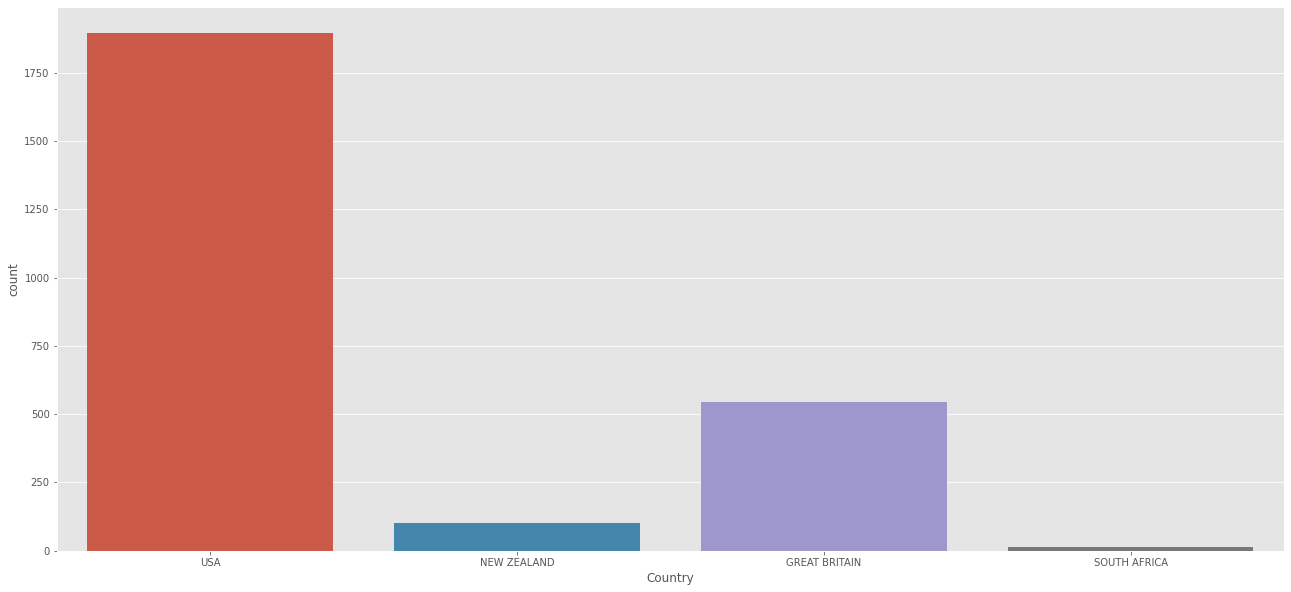

In [101]:
# country
print(aerial['Country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Country'])
plt.show()

ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: Target Country, dtype: int64


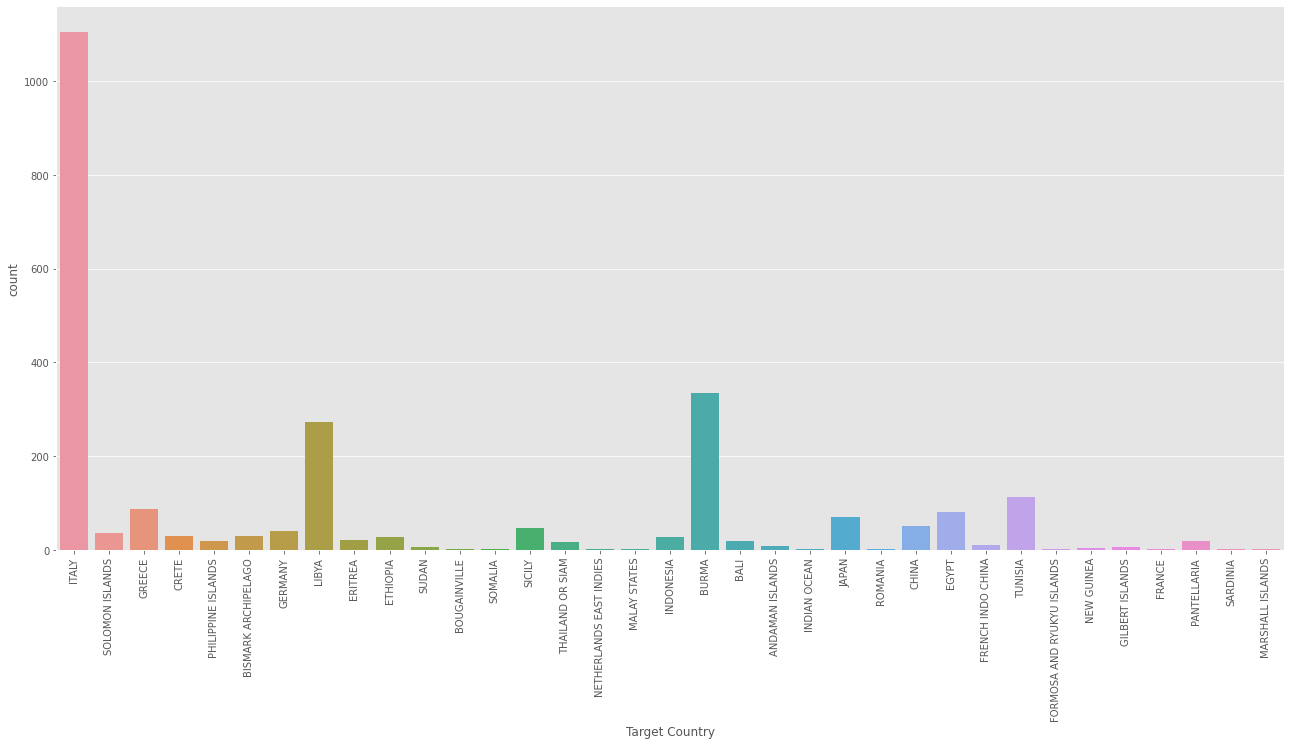

In [102]:
# Top target countries
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

A36             990
B25             416
B24             337
BLEN            180
LIB             145
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: Aircraft Series, dtype: int64


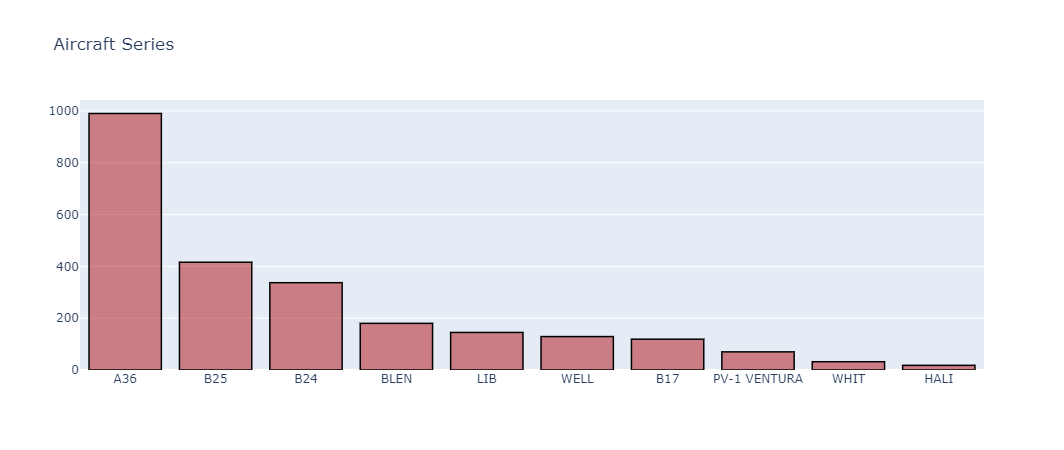

In [103]:
# Aircraft Series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data = [go.Bar(            
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

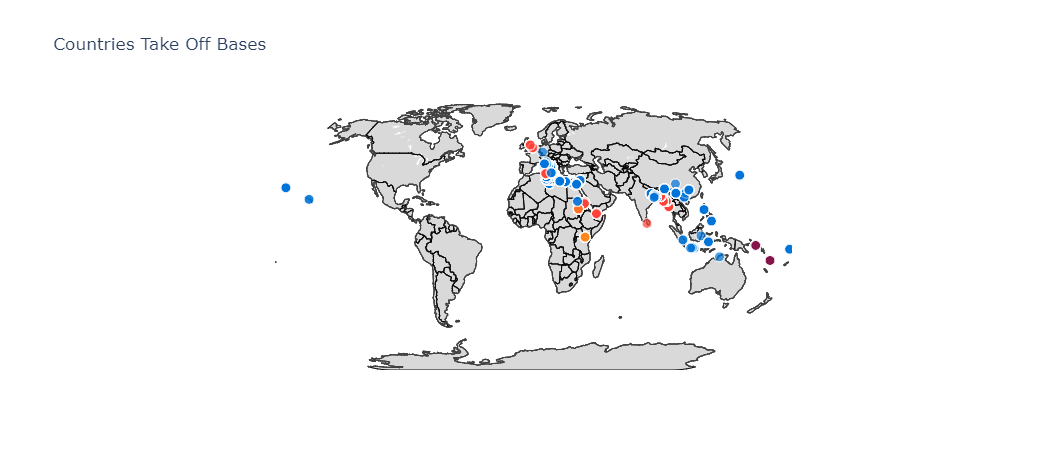

In [104]:

# ATTACK
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " +aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(
        projection = dict(
            type = 'natural earth',),
        showframe=False,
        showland=True,
        showcoastlines=True, 
        showcountries=True,
        countrywidth=1,
        #projection="natural earth",
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth=1,
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)',
        countrycolor="rgb(5, 5, 5)",
              )
)
fig = dict(data=data, layout=layout)
iplot(fig)

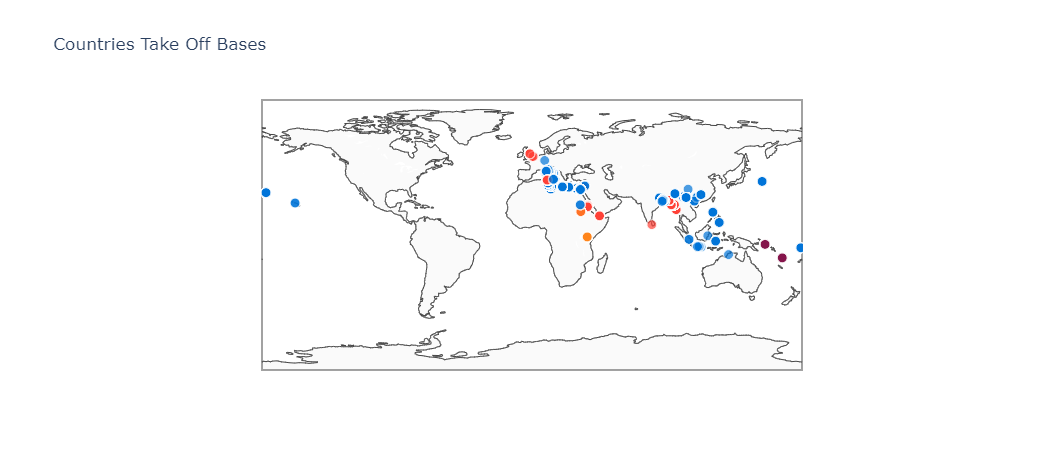

In [105]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scattergeo(
        type='scattergeo',
        lon = aerial['Takeoff Longitude'],
        lat = aerial['Takeoff Latitude'],
        hoverinfo = 'text',
        text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        
        mode = 'markers',
       marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),))

fig.update_layout(
        title = 'Countries Take Off Bases',
        geo = dict(
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),)
    
fig.show()




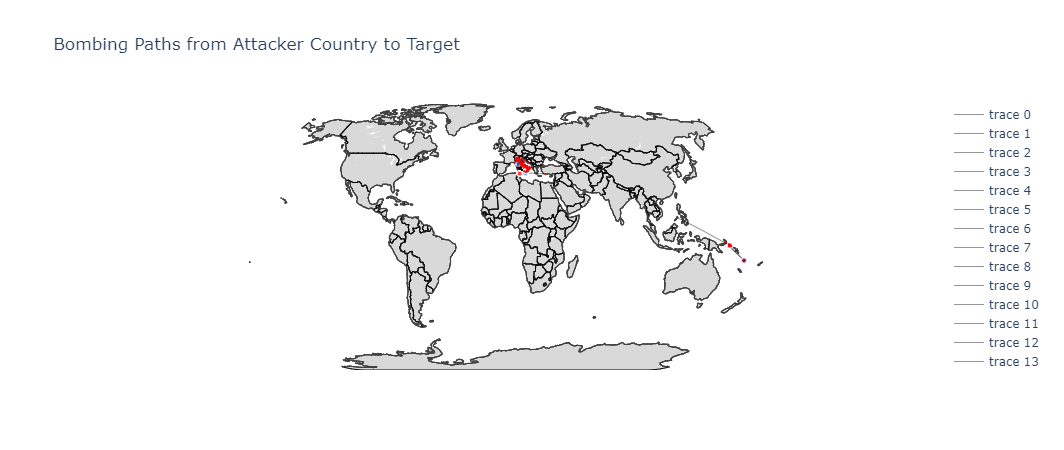

In [106]:
airports=[
    dict(
        type='scattergeo',
        lon=aerial['Takeoff Longitude'].iloc[:500],
        lat=aerial['Takeoff Latitude'].iloc[:500],
        hoverinfo='text',
        text= "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        mode='markers',
        marker=dict(
            size=5,
            color=aerial['color'],
            line=dict(
                width=1,
                color="white"),
            
        )
    )]
targets=[
    dict(
        type='scattergeo',
        lat=aerial["Target Latitude"].iloc[:500],
        lon=aerial["Target Longitude"].iloc[:500],
        hoverinfo="text",
        text="Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
        mode='markers',
        marker = dict( 
            size=1, 
            color = "red",
            line = dict(
                width=0.5,
                color = "red"
            )
        ))]
# trace3
flight_paths = []
for i in range( len( aerial['Target Longitude'].iloc[:500] ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ aerial.iloc[i,9], aerial.iloc[i,16] ],
            lat = [ aerial.iloc[i,8], aerial.iloc[i,15] ],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )
layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo = dict(
        projection=dict(
             type='natural earth',),
        showframe=False, 
        showland=True,
        showcoastlines=True,
        showcountries=True,
        countrywidth=1,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth=1,
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)',
        countrycolor="rgb(5, 5, 5)"),
        autosize=True
)

fig = go.Figure( data=flight_paths + airports+targets, layout=layout )
# fig.update_layout(height=3000,width=3000)
iplot( fig )

ETO: European Theater of Operations<br>
PTO: Pasific Theater of Operations<br>
MTO: Mediterranean Theater of Operations<br>
CBI: China-Burma-India Theater of Operations<br>
EAST AFRICA: East Africa Theater of Operations<br>
As you ca see from bombing paths, most of the bombing attack is done in Mediterranean theater of operations. Theater of Operations:

MTO            1802
CBI             425
PTO             247
ETO              44
EAST AFRICA      37
Name: Theater of Operations, dtype: int64


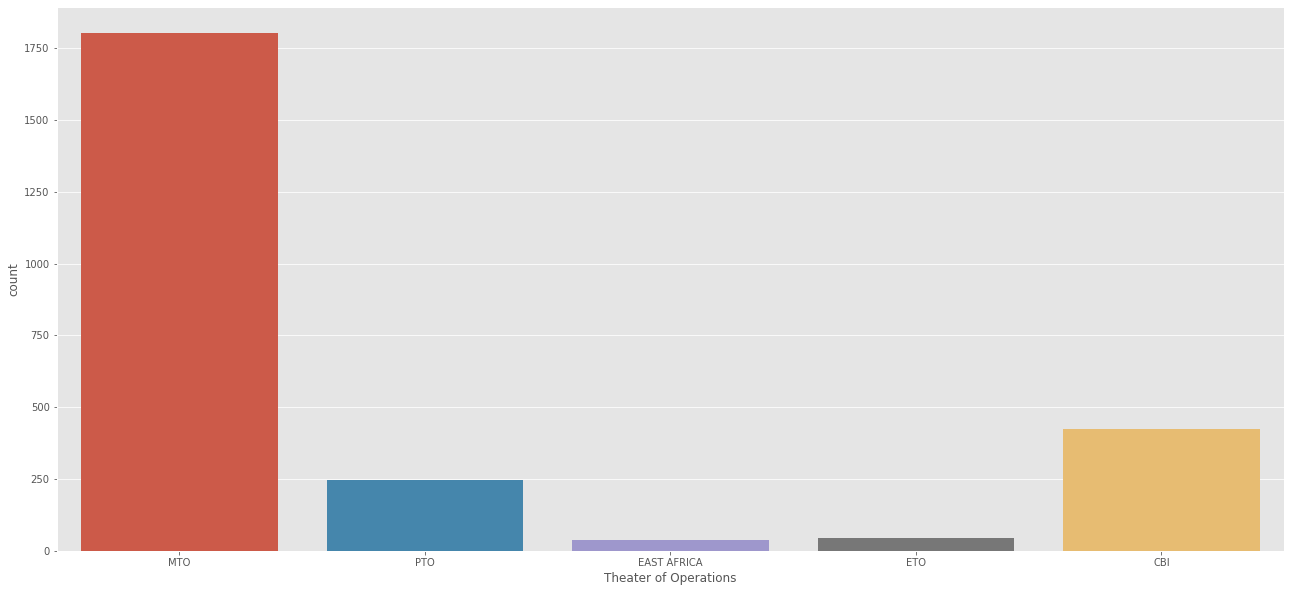

In [107]:
#Theater of Operations
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Theater of Operations'])
plt.show()

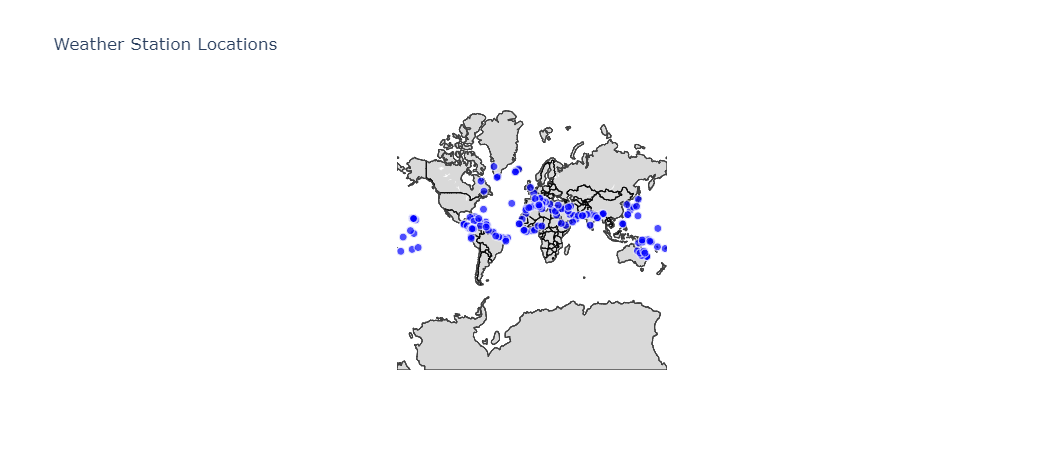

In [108]:
# weather station locations

data = [dict(
    type='scattergeo',
    lon = weather_station_location.Longitude,
    lat = weather_station_location.Latitude,
    hoverinfo = 'text',
    text = "Name: " + weather_station_location.NAME + " Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)